# Project: Investigation of a Medical Appointment Dataset

### Dataset Analyzed: No-show appointments dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. The following are the features of the dataset:
><ul>
    <li>PatientID</li>
    <li>AppointmentID</li>
    <li>Gender</li>
    <li>ScheduledDay - the day appointment was scheduled.</li>
    <li>AppointmentDay - the appointment day.</li>
    <li>Age</li>
    <li>Neighborhood - hospital location.</li>
    <li>Scholarship - <a href="https://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&ust=1532469042119000">Brasilian welfare program Bolsa Família</a>.</li>
    <li>Hipertension</li>
    <li>Diabetes</li>
    <li>Alcoholism</li>
    <li>Handcap</li>
    <li>SMS_received - '0' if they did not receive and '1' if they did.</li>
    <li>No-show: 'No' if the patient showed up to their appointment, and 'Yes' if they did not show up.</li>
</ul>

### Questions
> This project explores factors important in order to predict if a patient will show up or not for their medical appointment. 
> This project will seek to answer the following questions:
><ol>
    <li>How does gender of patients affect medical appointment attendance?</li>
    <li>Does the age of patients affect their attendance to medical appointments?</li>
    <li>In what way does waiting days ( the difference between appointment day and scheduled day) affect attendance to medical appointments?</li>
    <li>What is the percentage of patients who honored appointments against those who failed to show up?</li>
    <li>Does SMS reminder affect patients attendance to appointments?</li>
</ol>

In [1]:
# import packages

import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, the following are performed:
><ul>
    <li>load in the data.</li>
    <li>check for cleanliness.</li>
    <li>trim and clean dataset for analysis.</li> 
</ul>

### General Properties

In [2]:
# Load data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

#### Data Insight:
<ul>
    <li>There are 110,527 rows or entries in the dataset.</li>
    <li>There are 14 columns or features in the dataset.</li>
</ul>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Data Insight:
<ul>
    <li>There are 14 columns (features) in the dataset and 110,527 data entries.</li>
    <li>One column is float data type.</li>
    <li>Eight columns are integer data type.</li>
    <li>Five columns are string (object) data type.</li>
    <li>Zero null values i.e all the 110,527 entires are non-null.</li>
    <li>Appointment day and schedule day are not datatime type. These will be corrected later.</li>
</ul>

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Data Insights:
<ul>
    <li>The average age of the patient is 37 years old.</li>
    <li>The youngest patient is -1 years old, which is abnormal.</li>
    <li>The oldest patient is 115 years old.</li>
    <li>More than half of the SMS sent were not received.</li>
</ul>

In [6]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### Data Insights:
<ul>
    <li>No missing value.</li>
</ul>

In [7]:
df.duplicated().sum()

0

#### Data Insight:
<ul>
    <li>All data entries are unique.</li>
</ul>

In [8]:
# further investigation of duplicate value
df['AppointmentID'].duplicated().sum()

0

In [9]:
df['PatientId'].duplicated().sum()

48228

#### Data Insight:
<ul>
    <li>PatientID are unique identification numbers for patients.</li>
    <li>There are duplicate values here because it is possible for a patient to might have more one appointment or hospital visit.</li>
    <li>The AppointmentID is a proof that these duplicated PatientIDs where for different days.</li>
</ul>

In [10]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Data Cleaning 

In [11]:
# correct column name spelling
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap'},inplace=True) 
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [12]:
# Convert column names to lowercase and "-" to "_"
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True) 
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [13]:
# Add "_" before "id" in patientid and appointmentid  
df.rename(columns=lambda x: x.strip().replace("id", "_id"), inplace=True) 

# Add "_" before "day" in scheduledday and appointmentday
df.rename(columns=lambda x: x.strip().replace("day", "_day"), inplace=True) 
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [14]:
# Convert scheduled_day and appointment_day columns to datetime data type
days = ['scheduled_day','appointment_day']
for date in days:
    df[date] = pd.to_datetime(df[date])
#df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
#df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [15]:
df.dtypes

patient_id                     float64
appointment_id                   int64
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
handicap                         int64
sms_received                     int64
no_show                         object
dtype: object

### Create two additional columns
<ul>
    <li>waiting_days - the difference between appointment_day and schedule_day.</li>
    <li>age_range - infants, toddlers, children, teens, adults, mid_adults, senior_adults, 80+.</li>
</ul>

In [16]:
df['waiting_days'] = df['appointment_day'].dt.date - df['scheduled_day'].dt.date
df.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days


In [17]:
# Add age range
labels = ['infants', 'toddlers', 'children', 'teens', 'adults', 'mid_adults', 'senior_adults','80+']
max_age = df.age.max()
bins = [0, 1, 4, 12, 19, 39, 59, 79, max_age]

age_range = pd.cut(df['age'],labels=labels, bins=bins)
df['age_range'] = age_range
df.head(3)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days,age_range
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days,senior_adults
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days,mid_adults
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days,senior_adults


### Drop invalid rows

In [18]:
# age is less than 0
df.query('age < 0')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days,age_range
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,0 days,NaN


In [19]:
#dropping this row since age cannot be negative
df.drop(df.query('age == -1').index, inplace = True)

In [20]:
# Extract integers from the waiting_days feature
df['waiting_days'] = df['waiting_days'].astype(str)
df['waiting_days'] = df['waiting_days'].str.extract('(\d+)').astype(int)
df.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days,age_range
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,senior_adults
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,mid_adults


In [21]:
# waiting_days is less than 0
df.query('waiting_days == -1')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days,age_range


<a id='eda'></a>
## Exploratory Data Analysis

> In this section, we will explore answers to the project questions.

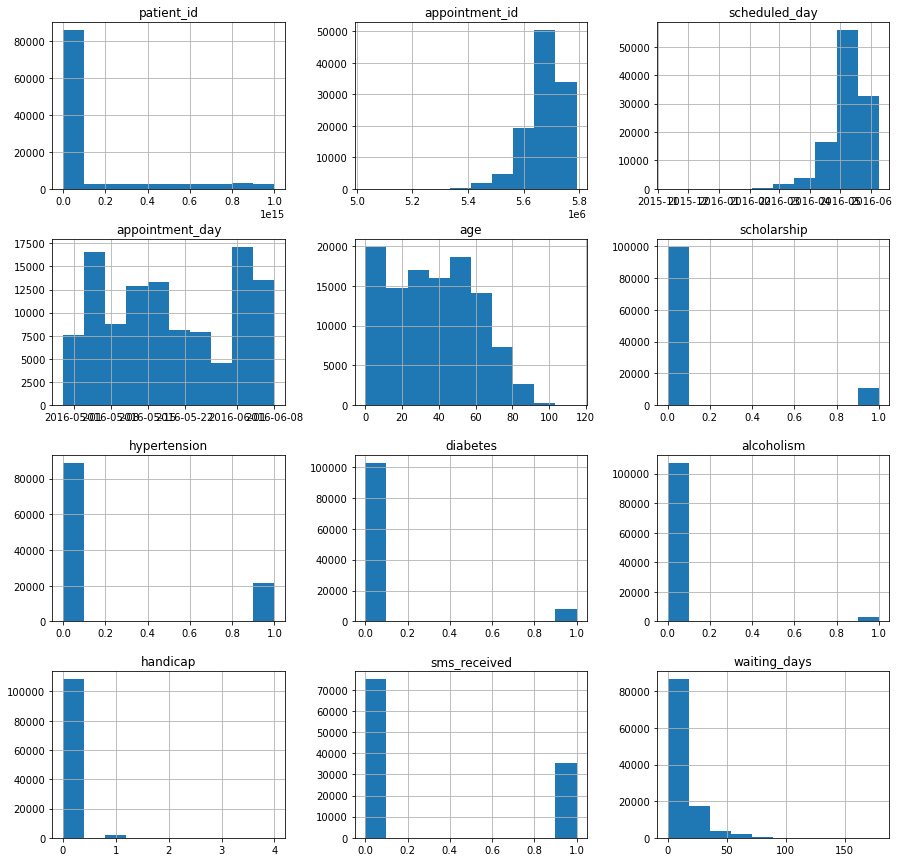

In [22]:
df.hist(figsize=(15,15));

In [23]:
def histplot(df, feat, figsize = (9, 6), stacked = True, normalize = False):
    df.groupby(feat)['no_show'].value_counts(normalize = normalize).mul(int
    (f'{100 if normalize else 1}')).round(2).unstack().plot(kind="bar",
    stacked=stacked, figsize=figsize,width=0.7,edgecolor='white',rot= 0);
    plt.ylabel("number of patients")
    plt.title(f"no-show across {feat}".title(),fontsize = 18, weight='bold');
    if normalize:
        plt.axhline(df['no_show'].value_counts(normalize = True).mul(100)[0],
                   color = 'green', ls = '-.', alpha = 0.75, label = 'proportion of Attendance\n (All patients)')
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5));

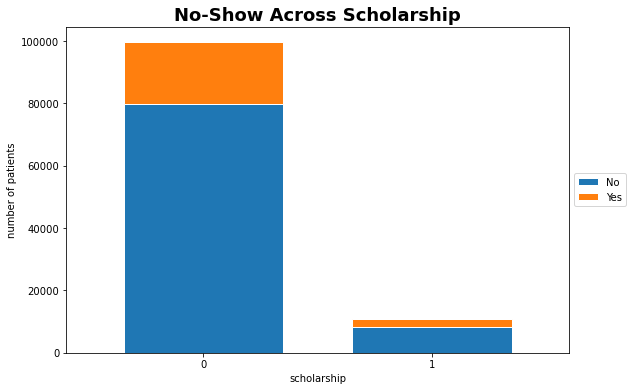

In [24]:
histplot(df,'scholarship')

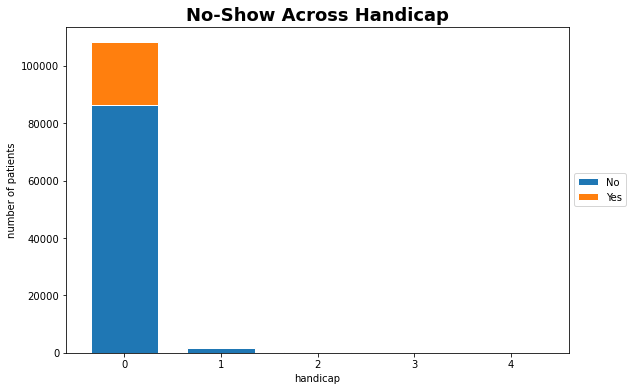

In [25]:
histplot(df,'handicap')

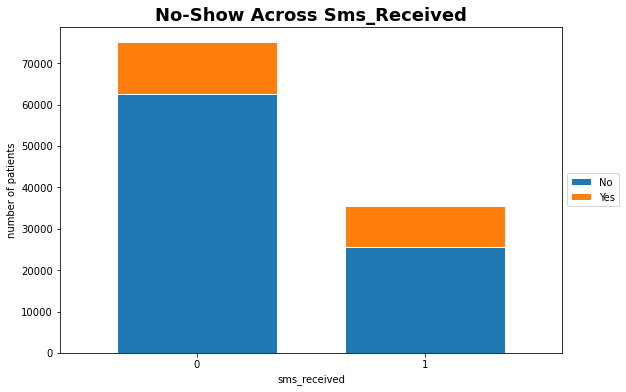

In [26]:
histplot(df, 'sms_received')

### Research Question 1 - How does gender of patients affect medical appointment attendance?

In [27]:
df.groupby('gender').no_show.value_counts(normalize=True)

gender  no_show
F       No         0.796851
        Yes        0.203149
M       No         0.800321
        Yes        0.199679
Name: no_show, dtype: float64

**No** means patient showed up.

**Yes** means patient missed appointment.

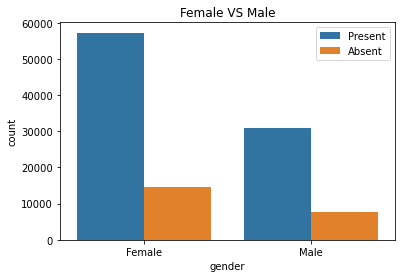

In [28]:
sns.countplot(x=df['gender'], hue=df['no_show']);
plt.title('Female VS Male');
plt.xticks([0, 1], ['Female', 'Male'], rotation=0);
plt.legend(['Present','Absent']);

#### Data Insight:
<ul>
    <li>More females visit the hospital than males.</li>
    <li>There is approximately equal percent of both genders that attended their medical appointment.</li>
    <li>The number of patients who attended their appointment is more than that of those who failed to show up(80%:20%).</li>
    <li>The gender of patients does not affect medical appointment attendance.</li>
</ul>

### Research Question 2 -  Does the age of patients affect their attendance to medical appointments?

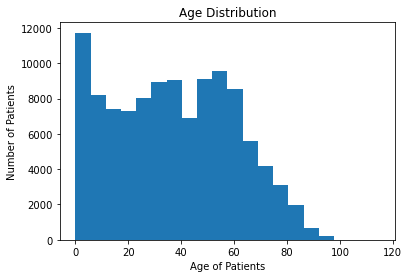

In [29]:
fig, ax = plt.subplots()
ax.hist(df['age'], linewidth=0.5, bins=20)
ax.set_xlabel("Age of Patients")
ax.set_title('Age Distribution');
ax.set_ylabel('Number of Patients');

In [30]:
# Total count of selected columns values. 
x = df.groupby(['age_range'])['no_show'].count() 
# Total count of selected columns values against patients who were present and those who were absent.
y = df.groupby(['age_range', 'no_show'])['no_show'].count() 
# Divide y by x to get the count of patients who were present and those who were absent
z = y/x 

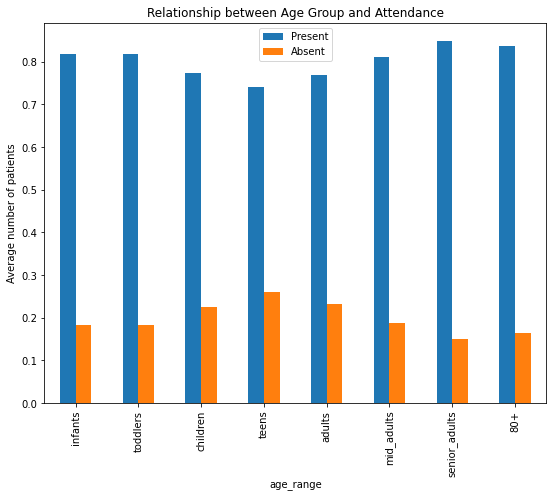

In [31]:
z.unstack().plot(kind = 'bar', figsize = (9,7));
plt.title('Relationship between Age Group and Attendance')
plt.ylabel('Average number of patients')
plt.legend(['Present','Absent']);

#### Data Insight:
<ul>
    <li>Only few patients in the age ranges missed their appoitments.</li>
    <li>Teens and adult age range have more patients that missed their appointment.</li>
    <li>There is no distinct correlation between a patient's age and their ability to attend an appointment.</li>
</ul>

### Research Question 3 - In what way does waiting days ( the difference between appointment day and scheduled day) affect attendance to medical appointments?

In [32]:
# Patients who have waiting days of not more than 15 days (sample)
df_wait = df.query('waiting_days <= 15') 
# Total count of selected columns values.
df_wait1 = df_wait.groupby(['waiting_days'])['no_show'].count() 
# Total count of selected columns values against patients who were present and those who were absent.
df_wait2 = df_wait.groupby(['waiting_days', 'no_show'])['no_show'].count() 
# Divide df_wait2 by df_wait1 to get the count of patients who were present and those who were absent
new_wait = df_wait2/df_wait1 

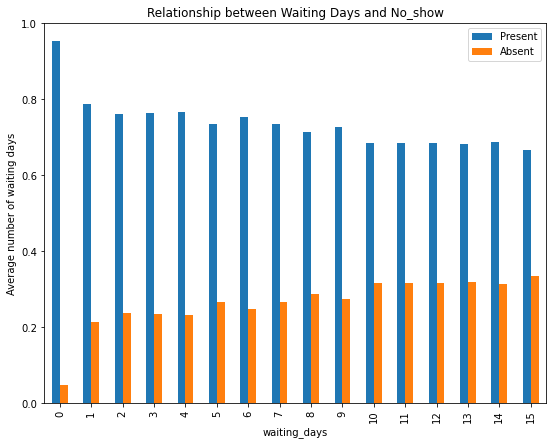

In [33]:
new_wait.unstack().plot(kind = 'bar', figsize = (9,7));
plt.title('Relationship between Waiting Days and No_show')
plt.ylabel('Average number of waiting days')
plt.legend(['Present','Absent']);

#### Data Insight:
<ul>
    <li>There is a direct relationship between waiting days and medical appointment attendance.</li> 
    <li>Patients who had their appointment on the same day as the scheduled date were present.</li> 
    <li>Increase in the number of waiting days affects attendance.</li>
    <li>The more days patients have to wait for their appointment, the less they show up when the date is due.</li>
</ul>

### Research Question 4 - What is the percentage of patients who honored appointments against those who failed to show up?

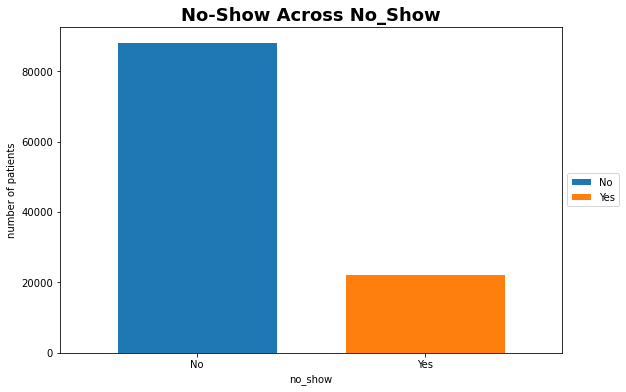

In [34]:
histplot(df,'no_show')

In [35]:
df.no_show.value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

**No** means patient showed up.

**Yes** means patient missed appointment.

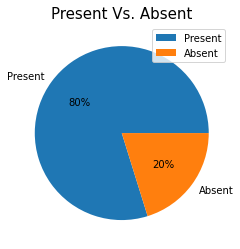

In [36]:
df_pie = df.no_show.value_counts()
plt.title('Present Vs. Absent', fontsize=15)
plt.pie(df_pie, labels=['Present', 'Absent'], autopct='%1.0f%%');
plt.legend();

#### Data Insight:
<ul>
    <li>The number of patients who attended their appointment is more than that of those who failed to show up.</li>
    <li>80% of patients attended their appointments while 20% of them missed.</li>
</ul>

### Research 5 - Does SMS reminder affect patients attendance to appointments?

In [37]:
df.groupby('sms_received').no_show.value_counts(normalize=True)

sms_received  no_show
0             No         0.832965
              Yes        0.167035
1             No         0.724255
              Yes        0.275745
Name: no_show, dtype: float64

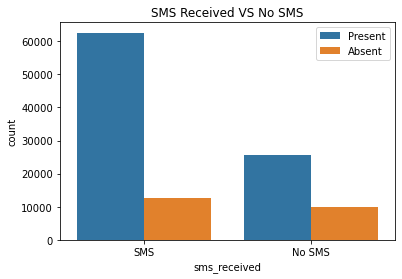

In [38]:
sns.countplot(x=df['sms_received'], hue=df['no_show']);
plt.title('SMS Received VS No SMS');
plt.xticks([0, 1], ['SMS', 'No SMS'], rotation=0);
plt.legend(['Present','Absent']);

#### Data Insight:
<ul>
    <li>From the analysis above, 83% of those who did not receive an sms reminder were present for their appointments.</li>
    <li>While 72% of those who received an sms reminder also honored their appointments.</li>
    <li>The chart shows that sms reminders had little to insignificant influence on attendance to medical appointments.</li>
</ul>

### Research 6 - Does scholarship affect patients attendance to appointments?

In [39]:
df.groupby('scholarship').no_show.value_counts(normalize=True)

scholarship  no_show
0            No         0.801926
             Yes        0.198074
1            No         0.762637
             Yes        0.237363
Name: no_show, dtype: float64

**No** means patient showed up.

**Yes** means patient missed appointment.

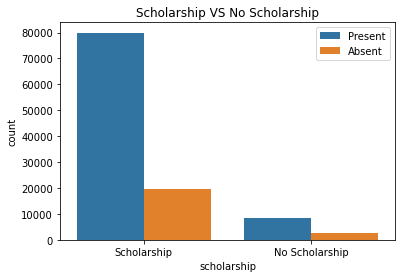

In [40]:
sns.countplot(x=df['scholarship'], hue=df['no_show']);
plt.title('Scholarship VS No Scholarship');
plt.xticks([0, 1], ['Scholarship', 'No Scholarship'], rotation=0);
plt.legend(['Present','Absent']);

#### Data Insight:
<ul>
    <li>Patients with scholarship (Brasilian welfare program Bolsa Família) visit the hospital more than those who are not enrolled in the program.</li>
    <li>There is small increase in attendance to medical appointment of patients with scholarship than those without scholarship.</li>
</ul>

<a id='conclusions'></a>
## Conclusions

><ul>
    <li>The gender of patients does not affect medical appointment attendance.</li>
    <li>More females visit the hospital than males.</li>
    <li>Age has little effect on medical appointment attendance.
    <li>80% of patients attended their appointments while 20% of them were absent.</li>
    <li>There is a negative effect on medical appointment attendance as the number of waiting days increases.</li>
    <li>Patients with scholarship (Brasilian welfare program Bolsa Família) visit the hospital more than those who are not enrolled in the program.</li>
    <li>Scholarship has little to zero effect on medical appointment attendance</li>
</ul>

### Limitations
><ul>
    <li>The effect of location (neighbourhood) on medical appointment atteandance was not examined.</li>
    <li>No idea how the appointment days were made or arrived at.</li> 
    <li>Why some patients have different waiting days even when they have same schedule dat.</li>
</ul>

**Reference**: https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

**Data source**: Kaggle